Привет, Андрей! Рад знакомству с тобой) Благодарю тебя за проверку моей работы и дельные замечания. Ниже я приведу список сделанных исправлений.

# Модуль 1, Спринт 1, Проект 1

Выполнил: Данила Козлов, студент 15 когорты дата-факультета яндекс практикума


### План Работы:
0. [Описание цели исследования](#cell0)
1. [Шаг 1. Первичный осмотр данных](#cell1)
    - [Откройте файл с данными и изучите общую информацию.](#cell1.1)
    - [Столбец children](#cell1.2)
    - [Столбец total_income](#cell1.3)
    - [Столбец income_type](#cell1.4)
    - [Столбец debt](#cell1.5)
    - [Столбец dob_years](#cell1.6)
    - [Вывод](#cell1.7)
2. [Шаг 2. Предобработка данных](#cell2)
    - [Столбец children](#cell2.1)
    - [Столбец education](#cell2.2)
    - [Столбец education_id](#cell2.3)
    - [Столбцы family_status и family_status_id](#cell2.4)
    - [Столбец gender](#cell2.5)
    - [Обработка пропусков](#cell2.6)
    	- [Столбец days_employed](#cell2.6.1)
    	- [Столбец total_income](#cell2.6.2)
    	- [Вывод](#cell2.6.3)
    - [Замена типа данных](#cell2.7)
        - [Вывод](#cell2.7.1)
    - [Обработка дубликатов](#cell2.8)
        - [Вывод](#cell2.8.1)
    - [Лемматизация](#cell2.9)
        - [Вывод](#cell2.9.1)
4. [Исследовательский анализ](#cell4)
	- [Категоризация данных](#cell4.1)
		- [Категоризация по целям:](#cell4.1.1)
		- [Категоризация по возрасту:](#cell4.1.2)
		- [Категоризация по ежемесячному доходу:](#cell4.1.3)
		- [Категоризация по количеству детей:](#cell4.1.4)
		- [Категоризация по семейному статусу:](#cell4.1.5)
5. [Шаг 3. Ответы на вопросы](#cell5)
	- [Есть ли зависимость между наличием детей и возвратом кредита в срок?](#cell5.1)
	- [Есть ли зависимость между семейным положением и возвратом кредита в срок?](#cell5.2)
	- [Есть ли зависимость между уровнем дохода и возвратом кредита в срок?](#cell5.3)
	- [Как разные цели кредита влияют на его возврат в срок?](#cell5.4)
6. [Шаг 4. Общий вывод](#cell6)
    


<a id="cell0"></a>
# Описание цели исследования

## Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Описание данных:
- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

<a id="cell1"></a>
# Первичный осмотр данных

<a id="cell1.1"></a>
### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from pymystem3 import Mystem
m = Mystem()
from collections import Counter

data = pd.read_csv('/datasets/data.csv')
print(data.info())

data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [2]:
data.tail(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21510,2,NaN,28,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,приобретение автомобиля
21511,0,-612.569129,29,высшее,0,гражданский брак,1,F,сотрудник,1,140068.472941,покупка жилья для сдачи
21512,0,-165.377752,26,высшее,0,Не женат / не замужем,4,M,компаньон,0,147301.457769,получение дополнительного образования
21513,0,-1166.216789,35,среднее,1,женат / замужем,0,F,сотрудник,0,250986.142309,покупка жилья
21514,0,-280.469996,27,неоконченное высшее,2,Не женат / не замужем,4,M,компаньон,0,355988.407188,строительство недвижимости
21515,1,-467.685130,28,среднее,1,женат / замужем,0,F,сотрудник,1,109486.327999,заняться образованием
21516,0,-914.391429,42,высшее,0,женат / замужем,0,F,компаньон,0,322807.776603,покупка своего жилья
21517,0,-404.679034,42,высшее,0,гражданский брак,1,F,компаньон,0,178059.553491,на покупку своего автомобиля
21518,0,373995.710838,59,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем
21519,1,-2351.431934,37,ученая степень,4,в разводе,3,M,сотрудник,0,115949.039788,покупка коммерческой недвижимости


<a id="cell1.2"></a>
### Столбец children




Рассмотрим сначала столбец `children`, так как с ним необходимо вести анализ.

In [3]:
print(data.children.value_counts())


 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


<a id="cell1.3"></a>
### Столбец total_income

In [4]:
print('Количество отрицательных записей:', len(data[data.total_income < 0]))
print()
print('Минимальное значение ежемесячного дохода:', data.total_income.min())

Количество отрицательных записей: 0

Минимальное значение ежемесячного дохода: 20667.26379327158


В столбце `total_income` не наблюдается отрицательных значений.

<a id="cell1.4"></a>
### Столбец income_type

In [5]:
print(data.income_type.value_counts())

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
в декрете              1
студент                1
Name: income_type, dtype: int64


<a id="cell1.5"></a>
### Столбец debt

In [6]:
print(data.debt.value_counts())
debt_part = 1741 / 19784
print(f'Доля должников в датасете: {debt_part:0.1%}')

0    19784
1     1741
Name: debt, dtype: int64
Доля должников в датасете: 8.8%


<a id="cell1.6"></a>
### Столбец dob_years

[42 36 33 32 53 27 43 50 35 41 40 65 54 56 26 48 24 21 57 67 28 63 62 47
 34 68 25 31 30 20 49 37 45 61 64 44 52 46 23 38 39 51  0 59 29 60 55 58
 71 22 73 66 69 19 72 70 74 75]


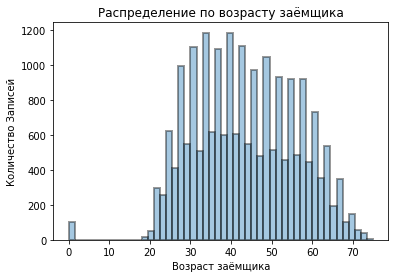

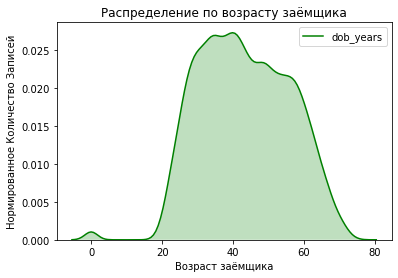

In [7]:
print(data.dob_years.unique())

plt.figure()
sns.distplot(data.dob_years, rug=False, kde=False, hist=True, norm_hist=False, hist_kws={"edgecolor": "black", "linewidth": 2})
plt.xlabel('Возраст заёмщика')
plt.ylabel('Количество Записей')
plt.title('Распределение по возрасту заёмщика')

plt.figure()
sns.kdeplot(data = data.dob_years, shade = True, color = 'g')
plt.xlabel('Возраст заёмщика')
plt.ylabel('Нормированное Количество Записей')
plt.title('Распределение по возрасту заёмщика')
plt.show()

Построили распределение по годам заемщиков, виден артефакт: Присутствуют заёмщики с возрастом 0 лет.

In [8]:
print('Минимальное значение возраста:', data.dob_years.min())
print('Количетво записей с возрастом 0 лет:', len(data[data.dob_years == 0]))

Минимальное значение возраста: 0
Количетво записей с возрастом 0 лет: 101


<a id="cell1.7"></a>
### Вывод

Просмотрев общую информацию по таблице имеем:
1. У нас есть 12 столбцов с 21525 записями. 
2. Мы имеем 2 столбца (`days_employed`, `total_income`) с одинаковым количеством пропусков, необходимо выяснить закономерно ли это и в чем причиа пропусков.
3. По типу данных, столбец `days_employed` имеет тип данных float, а должен быть int, так как количество дней - целочисленно.
4. После вывода первых десяти строк, сразу в глаза бросаются артефакты: 
 - в столбце `days_employed` - есть отрицательный стаж, а также стаж, превышающий среднюю продолжительность жизни (скорее всего следствие неправильной загрузки данных, одни данные в днях, другие в часах)
 - в столбце `education` - значения имеют разный регистр и не приведены к единому виду.
 - в столбце `children` есть записи -1 и 20, что неестественно
 - в столбце `dob_years` есть 101 запись с возрастом 0 лет

<a id="cell2"></a>
# Шаг 2. Предобработка данных

<a id="cell2.1"></a>
### Столбец children

В столбце `children` обнаружились артефакты:
 - записи с "-1" ребенком
 - записи с 20 детьми
 
Мы заменим все значения на положительные, а записи с 20-ю детьми исправим на 2 ребёнка.

In [9]:
#display(data[data.children == 20]) Получили 76 строк, скорее всего это ошибки в данных, так что заменю их просто на 2.
data.children = data.children.abs() # Заменил значения на положительные
data.loc[data.children == 20, 'children'] = 2 # Заменил значения с 20 детьми на 2 ребёнка
print(data.children.unique())

[1 0 3 2 4 5]


<a id="cell2.2"></a>
### Столбец education

Заменим в столбце `education` все значения на нижний регистр

In [10]:
print('Категории до:\n', data['education'].unique())
data['education'] = data['education'].str.lower()
print('Категории после:\n', data['education'].unique())

Категории до:
 ['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']
Категории после:
 ['высшее' 'среднее' 'неоконченное высшее' 'начальное' 'ученая степень']


Видно что множество дубликатов из-за различного регистра превратились всего в 5 категорий

<a id="cell2.3"></a>
### Столбец education_id

In [11]:
# Проверка столбцов на поиск артефактов и дубликатов

print(data.education_id.value_counts())
print()
print(data.education.value_counts())

1    15233
0     5260
2      744
3      282
4        6
Name: education_id, dtype: int64

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64


<a id="cell2.4"></a>
### Столбцы family_status и family_status_id

In [12]:
# Проверка столбцов на поиск артефактов и дубликатов
data['family_status'] = data['family_status'].str.lower()
print(data.family_status.value_counts())
print()
print(data.family_status_id.value_counts())


женат / замужем          12380
гражданский брак          4177
не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

0    12380
1     4177
4     2813
3     1195
2      960
Name: family_status_id, dtype: int64


<a id="cell2.5"></a>
### Столбец gender

In [13]:
print(data.gender.value_counts())

display(data[data.gender == 'XNA'])
data.loc[data.gender == 'XNA', 'gender'] = 'M'
print()
print(data.gender.value_counts())

F      14236
M       7288
XNA        1
Name: gender, dtype: int64


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,-2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости



F    14236
M     7289
Name: gender, dtype: int64


Обнаружилось непонятное значение XNA в половой принадлежности клиентов в единственном экземпляре. Для ясности заменим его на мужской пол. На выборку это единственное значение повлиять не должно.

In [14]:
print(data.debt.value_counts())

0    19784
1     1741
Name: debt, dtype: int64


<a id="cell2.6"></a>
## Обработка пропусков

Посмотрим на столбцы с пропусками: `days_employed`, `total_income`

In [15]:
display(data.loc[(data.days_employed.isnull()) & (data.total_income.notnull()), ['days_employed', 'total_income']])
nan_df = data.loc[data.days_employed.isnull(), ['days_employed', 'total_income']]
display(nan_df)
display(nan_df.total_income.value_counts(dropna = False))

,days_employed,total_income


,days_employed,total_income
12,NaN,NaN
26,NaN,NaN
29,NaN,NaN
41,NaN,NaN
55,NaN,NaN
...,...,...
21489,NaN,NaN
21495,NaN,NaN
21497,NaN,NaN
21502,NaN,NaN


NaN    2174
Name: total_income, dtype: int64

Как видно из ячейки выше - мы имеем 2174 строки с пропусками в двух столбцах одновременно. Это составляет 10.1% от всего набора данных. 

### Столбец days_employed
<a id="cell2.6.1"></a>

Что я хочу сделать?
 - заменить отрицательные значения в столбце `days_employed` на положительные
 - заменить значения превышающие продолжительность жизни (80 лет): поделить такие значения на 24, чтобы получить значение в днях

In [16]:
data.days_employed = data.days_employed.abs() #Заменим значения на положительные
employed_days_limit = 80*365 # 29200 дней

data.loc[data.days_employed > employed_days_limit, 'days_employed'] = data.loc[data.days_employed > employed_days_limit, 'days_employed'] / 24

Теперь заменю пустые значения Nan в столбце `days_employed` на медианные значения проработанных дней, сгруппированных по возрасту заёмщиков

In [17]:
def median_by_year(row):
    """ Данная функция возвращает значение медианы проработанных дней по возрасту должника из сгруппированных значений """
    years = row['dob_years']
    return grouped_by_dob_year.loc[years]


# сгруппируем данные по годам заемщиков и посчитаем медиану сколько дней работали
grouped_by_dob_year = data.groupby('dob_years').days_employed.median().rename(columns = {'days_employed': 'median_days_employed'}) 


try:
    data['median_employed'] = data.apply(median_by_year, axis = 1)
except:
    print('Возникла ошибка!')

data.loc[data.days_employed.isnull(), 'days_employed'] = data.loc[data.days_employed.isnull(), 'median_employed']

print("Количество пустых записей:", data.days_employed.isnull().sum())

Количество пустых записей: 0


<a id="cell2.6.2"></a>
### Столбец total_income

Теперь заменю пустые значения Nan в столбце `total_income` на медианные значения проработанных дней, сгруппированных по возрасту заёмщиков

In [18]:
median_total_income_by_dob_year = data.groupby('dob_years').agg({'total_income': 'median'}).rename(columns = {'total_income': "median_total_income"})
data = data.merge(median_total_income_by_dob_year, on = 'dob_years')
display(data.head(1)) # проверка, что столбец добавлен


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,median_employed,median_total_income
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,2253.98163,159167.992985


In [19]:
data.loc[data.total_income.isnull(), 'total_income'] = data.loc[data.total_income.isnull(), 'median_total_income']
print('Количество записей в датасете:', len(data)) # проверяю, что ничего не потерял
print("Количество пустых записей:", data.total_income.isnull().sum())

Количество записей в датасете: 21525
Количество пустых записей: 0


<a id="cell2.6.3"></a>
### Вывод

Пустые значения обработаны и заменены на медианные значения по возрасту заёмщика. Выбрана медиана для заполнения, так как она лучше отображает картину, чем среднее значение для данного датасета.


<a id="cell2.7"></a>
## Замена типа данных

Произвожу замену типов данных в столбцах `days_employed` и `total_income` с float на int. В первом столбце дни должны быть целочисленные, а во втором остаток из копеек не имеет значения для общей картины.

In [20]:
try:
    data['days_employed'] = data['days_employed'].astype('int')
    data['total_income'] = data['total_income'].astype('int')
except:
    print("Ошибка при изменении данных. Проверьте значения в столбцах.")
print("Значение типа столбца days_employed:", data.days_employed.dtypes)
print("Значение типа столбца total_income:", data.total_income.dtypes)

Значение типа столбца days_employed: int64
Значение типа столбца total_income: int64


<a id="cell2.7.1"></a>
### Вывод

Произведена замена чисел с плавующей точкой на целочисленный тип. Испольльзован метод astype, так как данные были предворительно обработанны. Но на всякий случай этот блок кода помещён в конструкцию try-except.

<a id="cell2.8"></a>
## Обработка дубликатов

In [21]:
print('Дубликатов до обработки:',data.duplicated().sum())
data.drop_duplicates(inplace = True)
print('Дубликатов после обработки:',data.duplicated().sum())

Дубликатов до обработки: 71
Дубликатов после обработки: 0


<a id="cell2.8.1"></a>
### Вывод

Так как мы просмотрели и исправили все данные и пустые значения, то методом `drop_duplicates()` избавились от 71 дубликата (до обработки данных их 54) в таблице. По сравнению с 21525 записями, дубликатов очень мало. Скорее всего они появились из-за повторного ввода в систему данных + те которые добавились из-за регистра в столбце `education`

<a id="cell2.9"></a>
## Лемматизация

Необходимо провести анализ по целям кредита и понять какие основные цели для заёмщика.
Для этого посмотрим на уникальные значения в столбце purpose, а затем проведем лемматизацию по целям и определим основные группы.

In [22]:
print(data.purpose.unique())

['покупка жилья' 'покупка недвижимости' 'сделка с подержанным автомобилем'
 'операции со своей недвижимостью' 'операции с недвижимостью'
 'операции с коммерческой недвижимостью'
 'покупка коммерческой недвижимости' 'свадьба'
 'строительство жилой недвижимости' 'образование' 'профильное образование'
 'высшее образование' 'на проведение свадьбы'
 'строительство собственной недвижимости' 'операции с жильем'
 'покупка жилой недвижимости' 'покупка жилья для сдачи' 'жилье'
 'получение образования' 'сделка с автомобилем' 'свой автомобиль'
 'заняться образованием' 'покупка своего жилья'
 'на покупку подержанного автомобиля' 'получение высшего образования'
 'приобретение автомобиля' 'на покупку своего автомобиля'
 'получение дополнительного образования' 'покупка жилья для семьи'
 'ремонт жилью' 'автомобиль' 'сыграть свадьбу' 'недвижимость'
 'заняться высшим образованием' 'строительство недвижимости' 'автомобили'
 'дополнительное образование' 'на покупку автомобиля']


In [23]:
text = ' '.join(data.purpose)
lemmas = m.lemmatize(text)
print(Counter(lemmas))
key_lemmas = ["недвижимость", "жилье", "автомобиль", "образование", "свадьба"]

Counter({' ': 55023, 'недвижимость': 6351, 'покупка': 5897, 'жилье': 4460, 'автомобиль': 4306, 'образование': 4013, 'с': 2918, 'операция': 2604, 'свадьба': 2324, 'свой': 2230, 'на': 2222, 'строительство': 1878, 'высокий': 1374, 'получение': 1314, 'коммерческий': 1311, 'для': 1289, 'жилой': 1230, 'сделка': 941, 'дополнительный': 906, 'заниматься': 904, 'подержать': 822, 'проведение': 768, 'сыграть': 765, 'сдача': 651, 'семья': 638, 'собственный': 635, 'со': 627, 'ремонт': 607, 'приобретение': 461, 'профильный': 436, 'подержанный': 142, '\n': 1})


<a id="cell2.9.1"></a>
### Вывод

Как видно из анализа по леммам выше - можно выделить 4 основные группы: 
 - "недвижимость"
 - "автомобиль"
 - "образование"
 - "свадьба"
 
Категория недвижимость включает в себя леммы со словами "недвижимость" и "жилье".
Выбрал для лемматизации библиотеку pymystem3 для лемматизации, так как она мне понравилась в тренажёре больше, чем библиотека nltk

<a id="cell4"></a>
# Исследовательский анализ

Напишу функцию для вывода графиков для анализа.

In [24]:
def print_figure(name_category, x_label, title, rotation = 0, wspace = 0.3):
    """
    Данная функция рисует 2 графика (без разделению по полу и с разделением)
    по указанной категории: name_category
    с подписью x оси: x_lable
    с общим заглавием: title
    c регулируемым параметрами поворота xticks: rotation (0 by default)
    с регулируемым параметром ширины между subplots: wspace (0.3 by default)
    """
    plt.figure(figsize=(10,5))
    
    ax1 = plt.subplot(121)
    sns.barplot(data = data, x = name_category, y = 'debt')
    ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals = 0))
    ax1.set_xlabel(x_label)
    ax1.set_ylabel('Доля Должников')
    plt.xticks(rotation = rotation)
    
    ax2 = plt.subplot(122)
    sns.barplot(data = data, x = name_category, y = 'debt', hue = 'gender')
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals = 0))
    ax2.set_xlabel(x_label + ' по полу')
    ax2.set_ylabel('Доля Должников')
    plt.xticks(rotation = rotation)
    
    plt.subplots_adjust(wspace = wspace)
    plt.suptitle(title)
    plt.show()
    


Напишу функции для вывода сводных таблиц:

In [25]:
def print_table(data, category):
    """
    Функция печатает 2 сводные таблицы отсортированные по возрастанию % должников, созданные методом groupby:
    1. Категория, количество записей, количество должников в %
    2. Категория, пол, количество записей, количество должников в %
    """
    table_pivot = data.groupby([category]).agg({'total_income': 'count', 'debt': 'mean'}).rename(columns={'total_income': 'count'})
    table_pivot.sort_values('debt', inplace = True)
    table_pivot.debt = table_pivot.debt.apply(lambda x: f'{x:.1%}')
    

    table_pivot_gender = data.groupby([category,'gender']).agg({'total_income': 'count', 'debt': 'mean'}).rename(columns={'total_income': 'count'})
    table_pivot_gender.sort_values('debt', inplace = True)
    table_pivot_gender.debt = table_pivot_gender.debt.apply(lambda x: f'{x:.1%}')
    
    display(table_pivot)
    display(table_pivot_gender)
    

def print_pivot_table(data, category, rus_category_name, gender = False):
    """
    Функция печатает полную сводную таблицу отсортированную по возрастанию % должников с помощью метода pivot_table
    Аргументы функции:
    data: - датафрейм
    category: - название столбца с категориями в таблице data
    rus_category_name - русское название категорий в итоговой сводной таблице
    gender: - условный параметр пола, если True, печатает таблицу с разделением по полу, False - печатает без разделения
    """
    if gender:
        table_pivot = data.pivot_table(index = [category, 'gender'], columns = 'debt', values = 'total_income', aggfunc = 'count')
    else:
        table_pivot = data.pivot_table(index = [category], columns = 'debt', values = 'total_income', aggfunc = 'count')

    table_pivot['Всего Наблюдений'] = table_pivot.apply(lambda row: row[0] + row[1], axis = 1)
    table_pivot['% Должников'] = table_pivot.loc[:, 1] / (table_pivot.loc[:, 1] + table_pivot.loc[:, 0])
    table_pivot.sort_values('% Должников', inplace = True)
    table_pivot['% Должников'] = table_pivot['% Должников'].apply(lambda x: f'{x:.1%}')
    table_pivot.rename(columns = {'debt': ''}, inplace = True)
    table_pivot.rename_axis(index = {'gender': 'Пол', category: rus_category_name}, columns = {'debt': ''}, inplace = True)
    display(table_pivot)

<a id="cell4.1"></a>
## Категоризация данных

<a id="cell4.1.1"></a>
### Категоризация по целям:

In [26]:
def purpose_group(purpose):
    '''
    Данная функция распределяет цели кредита по основным категориям:
        - 'недвижимость'
        - "автомобиль"
        - "образование"
        - "свадьба"
    '''
    lem = m.lemmatize(purpose)
    if ("недвижимость" in lem) or ("жилье" in lem):
        return "недвижимость"
    if "автомобиль" in lem:
        return "автомобили"
    if "образование" in lem:
        return "образование"
    if "свадьба" in lem:
        return "свадьба"
    return "другое"
data['purpose_category'] = data.purpose.apply(purpose_group)


Теперь выведем сводные таблицы и постоим графики.

In [27]:
print_table(data, 'purpose_category')

,count,debt
purpose_category,,
недвижимость,10811,7.2%
свадьба,2324,8.0%
образование,4013,9.2%
автомобили,4306,9.4%


,,count,debt
purpose_category,gender,,
недвижимость,F,7085,6.3%
свадьба,F,1562,6.9%
образование,F,2667,7.8%
автомобили,F,2860,8.2%
недвижимость,M,3726,9.1%
свадьба,M,762,10.2%
автомобили,M,1446,11.6%
образование,M,1346,12.1%


In [28]:
print_pivot_table(data, 'purpose_category', 'Цель Кредита')
print_pivot_table(data, 'purpose_category', 'Цель Кредита', gender = True)


,0,1,Всего Наблюдений,% Должников
Цель Кредита,,,,
недвижимость,10029,782,10811,7.2%
свадьба,2138,186,2324,8.0%
образование,3643,370,4013,9.2%
автомобили,3903,403,4306,9.4%


,,0,1,Всего Наблюдений,% Должников
Цель Кредита,Пол,,,,
недвижимость,F,6641,444,7085,6.3%
свадьба,F,1454,108,1562,6.9%
образование,F,2460,207,2667,7.8%
автомобили,F,2625,235,2860,8.2%
недвижимость,M,3388,338,3726,9.1%
свадьба,M,684,78,762,10.2%
автомобили,M,1278,168,1446,11.6%
образование,M,1183,163,1346,12.1%


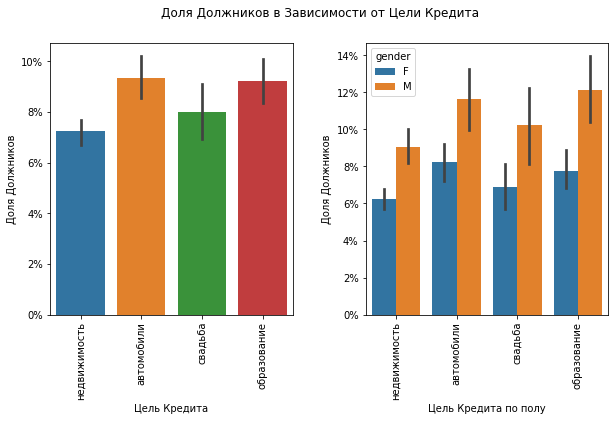

In [29]:
print_figure(name_category = 'purpose_category', x_label = 'Цель Кредита', title = 'Доля Должников в Зависимости от Цели Кредита', rotation = 90)

<a id="cell4.1.2"></a>
### Категоризация по возрасту:

In [30]:
def age_group(age):
    """
    Возвращает возрастную группу по значению возраста age, используя правила:
    - 'молодые' при значении age < 35 лет
    - 'взрослые' при значениии age более 35 и менее 64, включая 64
    - 'пенсионеры' во всех остальных случаях
    """

    if age < 35:
            return 'молодые'
    if age < 65:
            return 'взрослые'
    return 'пенсионеры'

data['age_category'] = data.dob_years.apply(age_group)

In [31]:
print_pivot_table(data, 'age_category', 'Возраст')
print_pivot_table(data, 'age_category', 'Возраст', gender = True)


,0,1,Всего Наблюдений,% Должников
Возраст,,,,
пенсионеры,846,49,895,5.5%
взрослые,13458,1033,14491,7.1%
молодые,5409,659,6068,10.9%


0    1  Всего Наблюдений % Должников
Возраст    Пол                                         
пенсионеры F     652   35               687        5.1%
взрослые   F    9324  601              9925        6.1%
пенсионеры M     194   14               208        6.7%
взрослые   M    4134  432              4566        9.5%
молодые    F    3204  358              3562       10.1%
           M    2205  301              2506       12.0%

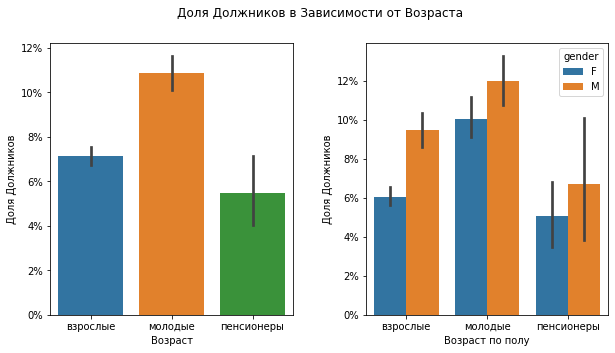

In [32]:
print_figure(name_category = 'age_category', x_label = 'Возраст', title = 'Доля Должников в Зависимости от Возраста', rotation = 0)

<a id="cell4.1.3"></a>
### Категоризация по ежемесячному доходу:

Посмотрим какое у нас распределение по ежемесячному доходу, чтобы лучше понимать по каким категориям распределить эти доходы.

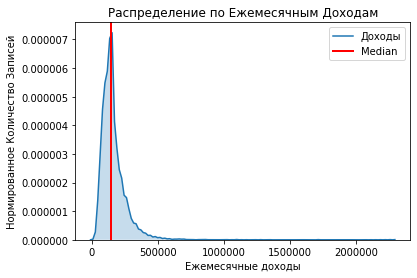

Медиана: 146499.5


In [33]:
plt.figure()
sns.kdeplot(data.total_income, shade = True, label = 'Доходы')
plt.xlabel('Ежемесячные доходы')
plt.ylabel('Нормированное Количество Записей')
plt.title('Распределение по Ежемесячным Доходам')
plt.axvline(data.total_income.median(), color='r', linestyle='solid', linewidth=2, label="Median")
plt.legend()
plt.show()
print('Медиана:', data.total_income.median())

In [34]:
data.total_income.describe()

count    2.145400e+04
mean     1.652705e+05
std      9.808097e+04
min      2.066700e+04
25%      1.075155e+05
50%      1.464995e+05
75%      1.958132e+05
max      2.265604e+06
Name: total_income, dtype: float64

Из графика видно что у нас основная масса находится в диапазоне от 0 до 250000 с медианой около 150000. Также имеем длинный хвост с доходами превышающими 500000. Из этого я разделю доходы на 4 категории: низкий (< 75000), средний (от 75000 до 150000), высокий (от 150000 до 225000), очень высокий (> 225000).

In [35]:
def income_group(income):
    """
    Возвращает группу по значению ежемесячной прибыли income, используя правила:
    - 'низкий' при значении income < 75000
    - 'средний' при значениии income более 75000 и менее 150000, не включая 150000
    - 'высокий' при значениии income более 150000 и менее 225000, не включая 225000
    - 'очень высокий' во всех остальных случаях
    """

    if income < 75000:
            return 'низкий'
    if income < 150000:
            return 'средний'
    if income < 225000:
            return 'высокий'
    return 'очень высокий'

data['income_category'] = data.total_income.apply(income_group)

In [36]:
print_pivot_table(data, 'income_category', 'Доход')
print_pivot_table(data, 'income_category', 'Доход', gender = True)


,0,1,Всего Наблюдений,% Должников
Доход,,,,
очень высокий,3506,267,3773,7.1%
низкий,1729,136,1865,7.3%
высокий,5771,533,6304,8.5%
средний,8707,805,9512,8.5%


,,0,1,Всего Наблюдений,% Должников
Доход,Пол,,,,
низкий,F,1445,100,1545,6.5%
очень высокий,F,1865,130,1995,6.5%
высокий,F,3543,256,3799,6.7%
средний,F,6327,508,6835,7.4%
очень высокий,M,1641,137,1778,7.7%
высокий,M,2228,277,2505,11.1%
средний,M,2380,297,2677,11.1%
низкий,M,284,36,320,11.2%


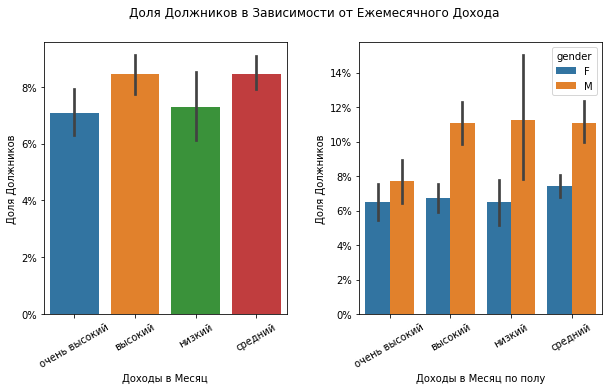

In [37]:
print_figure(name_category = 'income_category', x_label = 'Доходы в Месяц', title = 'Доля Должников в Зависимости от Ежемесячного Дохода', rotation = 30)

<a id="cell4.1.4"></a>
### Категоризация по количеству детей:

In [38]:
def children_group(childrens):
    """
    Возвращает категорию по количеству детей children, используя правила:
    - нет детей' если количество детей children = 0
    - '1-2 ребенка' если количество детей children от 1 до 2 включительно
    - 'многодетные' если количество детей children >= 3
    """

    if childrens == 0:
            return 'нет детей'
    if childrens < 3:
            return '1-2 ребенка'
    return 'многодетные'


data['children_category'] = data.children.apply(children_group)

In [39]:
print_pivot_table(data, 'children_category', 'Количество Детей')
print_pivot_table(data, 'children_category', 'Количество Детей', gender = True)

,0,1,Всего Наблюдений,% Должников
Количество Детей,,,,
нет детей,13028,1063,14091,7.5%
многодетные,349,31,380,8.2%
1-2 ребенка,6336,647,6983,9.3%


,,0,1,Всего Наблюдений,% Должников
Количество Детей,Пол,,,,
нет детей,F,8928,592,9520,6.2%
многодетные,F,213,18,231,7.8%
1-2 ребенка,F,4039,384,4423,8.7%
многодетные,M,136,13,149,8.7%
1-2 ребенка,M,2297,263,2560,10.3%
нет детей,M,4100,471,4571,10.3%


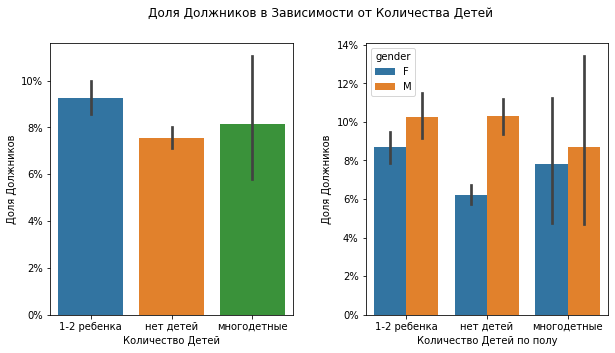

In [40]:
print_figure(name_category = 'children_category', x_label = 'Количество Детей', title = 'Доля Должников в Зависимости от Количества Детей', rotation = 0)

<a id="cell4.1.5"></a>
## Категоризация по семейному статусу:

In [41]:
print_pivot_table(data, 'family_status', 'Семейный Статус')
print_pivot_table(data, 'family_status', 'Семейный Статус', gender = True)

,0,1,Всего Наблюдений,% Должников
Семейный Статус,,,,
вдовец / вдова,896,63,959,6.6%
в разводе,1110,85,1195,7.1%
женат / замужем,11408,931,12339,7.5%
гражданский брак,3763,388,4151,9.3%
не женат / не замужем,2536,274,2810,9.8%


,,0,1,Всего Наблюдений,% Должников
Семейный Статус,Пол,,,,
вдовец / вдова,F,852,52,904,5.8%
в разводе,F,875,61,936,6.5%
не женат / не замужем,F,1611,118,1729,6.8%
женат / замужем,F,7230,530,7760,6.8%
гражданский брак,F,2612,233,2845,8.2%
женат / замужем,M,4178,401,4579,8.8%
в разводе,M,235,24,259,9.3%
гражданский брак,M,1151,155,1306,11.9%
не женат / не замужем,M,925,156,1081,14.4%


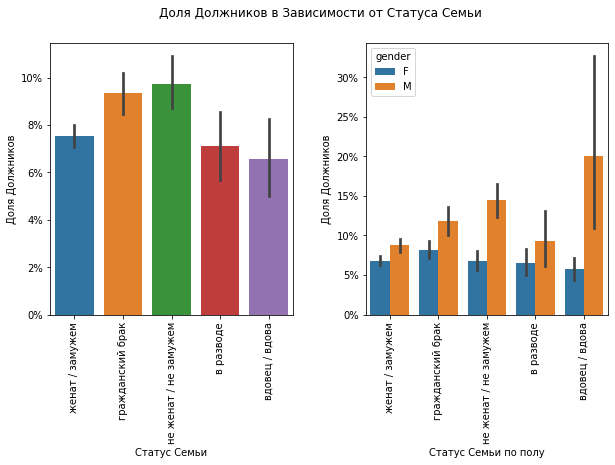

In [42]:
print_figure(name_category = 'family_status', x_label = 'Статус Семьи', title = 'Доля Должников в Зависимости от Статуса Семьи', rotation = 90)

<a id="cell5"></a>
## Шаг 3. Ответьте на вопросы

<a id="cell5.1"></a>
- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [43]:
print_table(data,'children_category')

,count,debt
children_category,,
нет детей,14091,7.5%
многодетные,380,8.2%
1-2 ребенка,6983,9.3%


,,count,debt
children_category,gender,,
нет детей,F,9520,6.2%
многодетные,F,231,7.8%
1-2 ребенка,F,4423,8.7%
многодетные,M,149,8.7%
1-2 ребенка,M,2560,10.3%
нет детей,M,4571,10.3%


[График](#cell4.1.4)

Из графика видно, что когда нет детей, то вероятность возвращения кредита в срок повышается по сравнению с семьями с 1-2 детьми. 
С многодетными семьями сложно сравнивать, так как разброс слишком высокий из-за маленькой выборки.

### Вывод

Лучше давать кредит семьям у которых нет детей.

<a id="cell5.2"></a>
**- Есть ли зависимость между семейным положением и возвратом кредита в срок?**

[График](#cell4.1.5)

Из графика видно, что самый низкий процент должников у тех людей, кто находится в разводе и те, кто потерял супруга.
Самый высокий процент должников приходится на тех, кто не женат и не за мужем.

In [44]:
print_table(data, 'family_status')

,count,debt
family_status,,
вдовец / вдова,959,6.6%
в разводе,1195,7.1%
женат / замужем,12339,7.5%
гражданский брак,4151,9.3%
не женат / не замужем,2810,9.8%


,,count,debt
family_status,gender,,
вдовец / вдова,F,904,5.8%
в разводе,F,936,6.5%
не женат / не замужем,F,1729,6.8%
женат / замужем,F,7760,6.8%
гражданский брак,F,2845,8.2%
женат / замужем,M,4579,8.8%
в разводе,M,259,9.3%
гражданский брак,M,1306,11.9%
не женат / не замужем,M,1081,14.4%


### Вывод

Вдовцы, вдовы и разведенные возвращают кредит лучше, чем люди в отношениях.

Мужчинам вдовцам доверять кредит не стоит(20% невозврата), но скорее всего это просто маленькая выборка

<a id="cell5.3"></a>
**- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

In [45]:
print_table(data,'income_category')

table_pivot = data.groupby(['income_category','income_type']).agg({'total_income': 'count', 'debt': 'mean'}).rename(columns={'total_income': 'count'})
table_pivot.sort_values('debt', inplace = True)
table_pivot.debt = table_pivot.debt.apply(lambda x: f'{x:.1%}')
display(table_pivot)

,count,debt
income_category,,
очень высокий,3773,7.1%
низкий,1865,7.3%
высокий,6304,8.5%
средний,9512,8.5%


,,count,debt
income_category,gender,,
низкий,F,1545,6.5%
очень высокий,F,1995,6.5%
высокий,F,3799,6.7%
средний,F,6835,7.4%
очень высокий,M,1778,7.7%
высокий,M,2505,11.1%
средний,M,2677,11.1%
низкий,M,320,11.2%


,,count,debt
income_category,income_type,,
высокий,безработный,1,0.0%
средний,предприниматель,1,0.0%
очень высокий,предприниматель,1,0.0%
средний,студент,1,0.0%
очень высокий,госслужащий,266,4.9%
низкий,пенсионер,674,5.0%
высокий,госслужащий,463,5.4%
очень высокий,пенсионер,388,5.7%
средний,пенсионер,1997,5.7%


[График](#cell4.1.3)

Люди имеющий уровень дохода "очень высокий" (> 225000) и "низкий" уровень дохода (< 75000) имеют меньше должников, чем люди с доходами от 75000 до 225000.

Госслужащие и пенсионеры хорошо возвращают кредиты вне зависимости от дохода.

### Вывод

Стремиться к доходу > 225000 и надежно получать кредит от банка.

<a id="cell5.4"></a>
**- Как разные цели кредита влияют на его возврат в срок?**

In [46]:
print_table(data, 'purpose_category')

table_pivot = data.groupby(['purpose_category','income_type']).agg({'total_income': 'count', 'debt': 'mean'}).rename(columns={'total_income': 'count'})
table_pivot.sort_values('debt', inplace = True)
table_pivot.debt = table_pivot.debt.apply(lambda x: f'{x:.1%}')
display(table_pivot)

,count,debt
purpose_category,,
недвижимость,10811,7.2%
свадьба,2324,8.0%
образование,4013,9.2%
автомобили,4306,9.4%


,,count,debt
purpose_category,gender,,
недвижимость,F,7085,6.3%
свадьба,F,1562,6.9%
образование,F,2667,7.8%
автомобили,F,2860,8.2%
недвижимость,M,3726,9.1%
свадьба,M,762,10.2%
автомобили,M,1446,11.6%
образование,M,1346,12.1%


count    debt
purpose_category income_type                   
недвижимость     предприниматель      1    0.0%
свадьба          предприниматель      1    0.0%
недвижимость     студент              1    0.0%
свадьба          госслужащий        159    4.4%
недвижимость     госслужащий        754    4.8%
                 пенсионер         1891    4.9%
свадьба          пенсионер          422    5.9%
автомобили       пенсионер          795    6.4%
недвижимость     компаньон         2547    6.6%
образование      пенсионер          721    6.7%
                 компаньон          954    7.5%
автомобили       госслужащий        286    7.7%
                 компаньон         1052    8.1%
образование      госслужащий        258    8.1%
свадьба          сотрудник         1217    8.4%
недвижимость     сотрудник         5615    8.7%
свадьба          компаньон          525    9.9%
образование      сотрудник         2080   11.0%
автомобили       сотрудник         2172   11.2%
недвижимость     безработный          2   50.0%
автомобили       в декрете            1  100.0%

[График](#cell4.1.1)

Лучше всего люди возвращают кредиты за свадьбу и за недвижимость, а за автомобили и образование хуже.

### Вывод

Давать кредиты на недвижимость и на свадьбы - надежнее.

<a id="cell6"></a>
### Шаг 4. Общий вывод

**Цель проекта:** помочь кредитному отделу банка понять влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. 

После анализа данных обнаружилось, что самые надежные заёмщики: клиенты *без детей*, клиенты без отношений (*вдовцы/вдовы, разведенные*), имеющие уровень дохода либо *низкий (< 75000)*, либо очень *высокий ( > 225000 )*, берущие кредит с целью покупки *недвижимости* или *на свадьбу*. Также рекомендован выбор людей с возрастом больше 35 лет. 

Ещё одно интересное наблюдение, выявленное во время проекта: По всем категориям  доля женщин-должников меньше доли мужчин-должников. Соответственно лучше выдавать кредит женщинам, основываясь на этих данных.
